In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# It will take care of all required libraried

from pyforest import * 

lazy_imports()

['from pyspark import SparkContext',
 'import sys',
 'from sklearn.decomposition import PCA',
 'from sklearn.cluster import KMeans',
 'from sklearn.linear_model import Ridge',
 'import os',
 'from sklearn.model_selection import train_test_split',
 'import matplotlib as mpl',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import xgboost as xgb',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.linear_model import RidgeCV',
 'import tensorflow as tf',
 'from pathlib import Path',
 'from sklearn.preprocessing import StandardScaler',
 'from fbprophet import Prophet',
 'from sklearn.model_selection import KFold',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn import metrics',
 'from sklearn.model_selection import GridSearchCV',
 'import datetime as dt',
 'import plotly.express as px',
 'from sklearn.preprocessing import RobustScaler',
 'import pickle',
 'from sklearn.model_selection import cross_val_score',
 'import cv2',
 '

In [3]:
data = pd.read_csv("breastCancer.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data pre-processing

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
data.shape

(699, 11)

In [7]:
data.dtypes

#bare_nucleoli should be int but showing Object type

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
pd.set_option('display.max_rows', None)
data['bare_nucleoli']

# at index 23, there is '?'

<IPython.core.display.Javascript object>

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
40      ?
41      3
42     10
43      1
44      1
45      1
46      9
47      1
48      1
49      8
50      3
51      4
52      5
53      8
54      8
55      5
56      6
57      1
58     10
59      2
60      3
61      2
62      8
63      2
64      1
65      2
66      1
67     10
68      9
69      1
70      1
71      2
72      1
73     10
74      4
75      2
76      1
77      1
78      3
79      1
80      1
81      1
82      1
83      2
84      9
85      4
86      8
87     10
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      6
99     10


In [9]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [11]:
# isdigit() method returns True if all the characters are digits, otherwise False

digits_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [12]:
pd.set_option('display.max_rows', None)
digits_in_bare_nucleoli

# at 23 index it will give us False

<IPython.core.display.Javascript object>

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [13]:
#as python doesnot understand ?, replcae with nan
data = data.replace('?',np.NaN)
pd.set_option('display.max_rows', None)
data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
data.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [15]:
data = data.fillna(data.median())

In [16]:
data['bare_nucleoli']
pd.set_option('display.max_rows', None)

<IPython.core.display.Javascript object>

In [17]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [18]:
data['bare_nucleoli'] = data['bare_nucleoli'].astype('int64')

In [19]:
data.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Exploratory Data Analysis

In [20]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [21]:
# 1=COLUMN, 0 = ROW
data.drop('id', axis=1, inplace =True)

In [22]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## Bivariate analysis

In [24]:
sns.distplot(df['class'])

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

## Multivariate analysis

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'size_uniformity'}>,
        <AxesSubplot:title={'center':'shape_uniformity'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'epithelial_size'}>,
        <AxesSubplot:title={'center':'bare_nucleoli'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

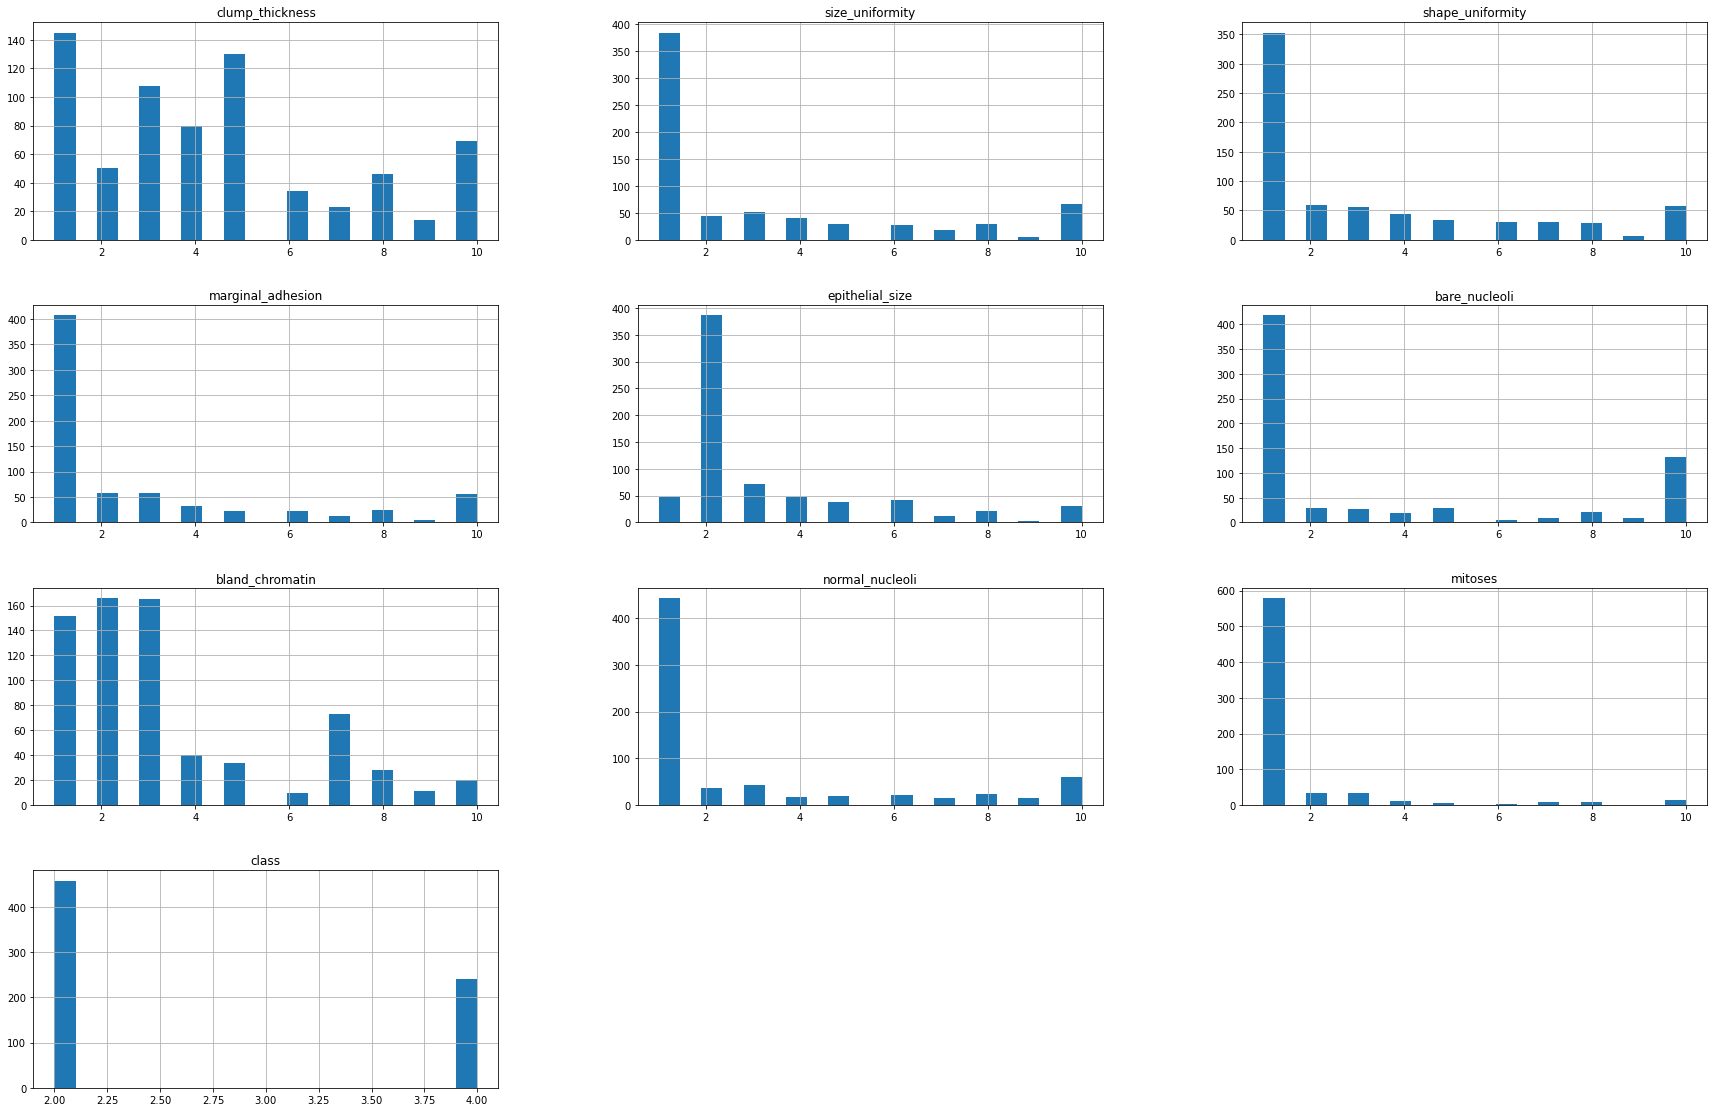

In [25]:
data.hist(bins=20, figsize=(30,30), layout=(6,3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

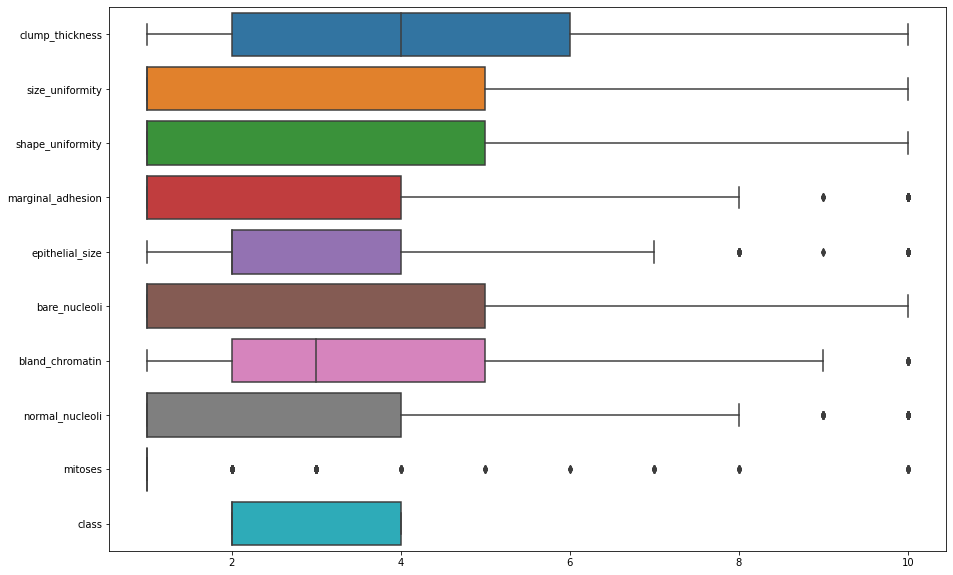

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data,orient='h')

#we will not remove outliers as they dont impact our data much

In [27]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(data.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation b/w difernt attributes')

<IPython.core.display.Javascript object>

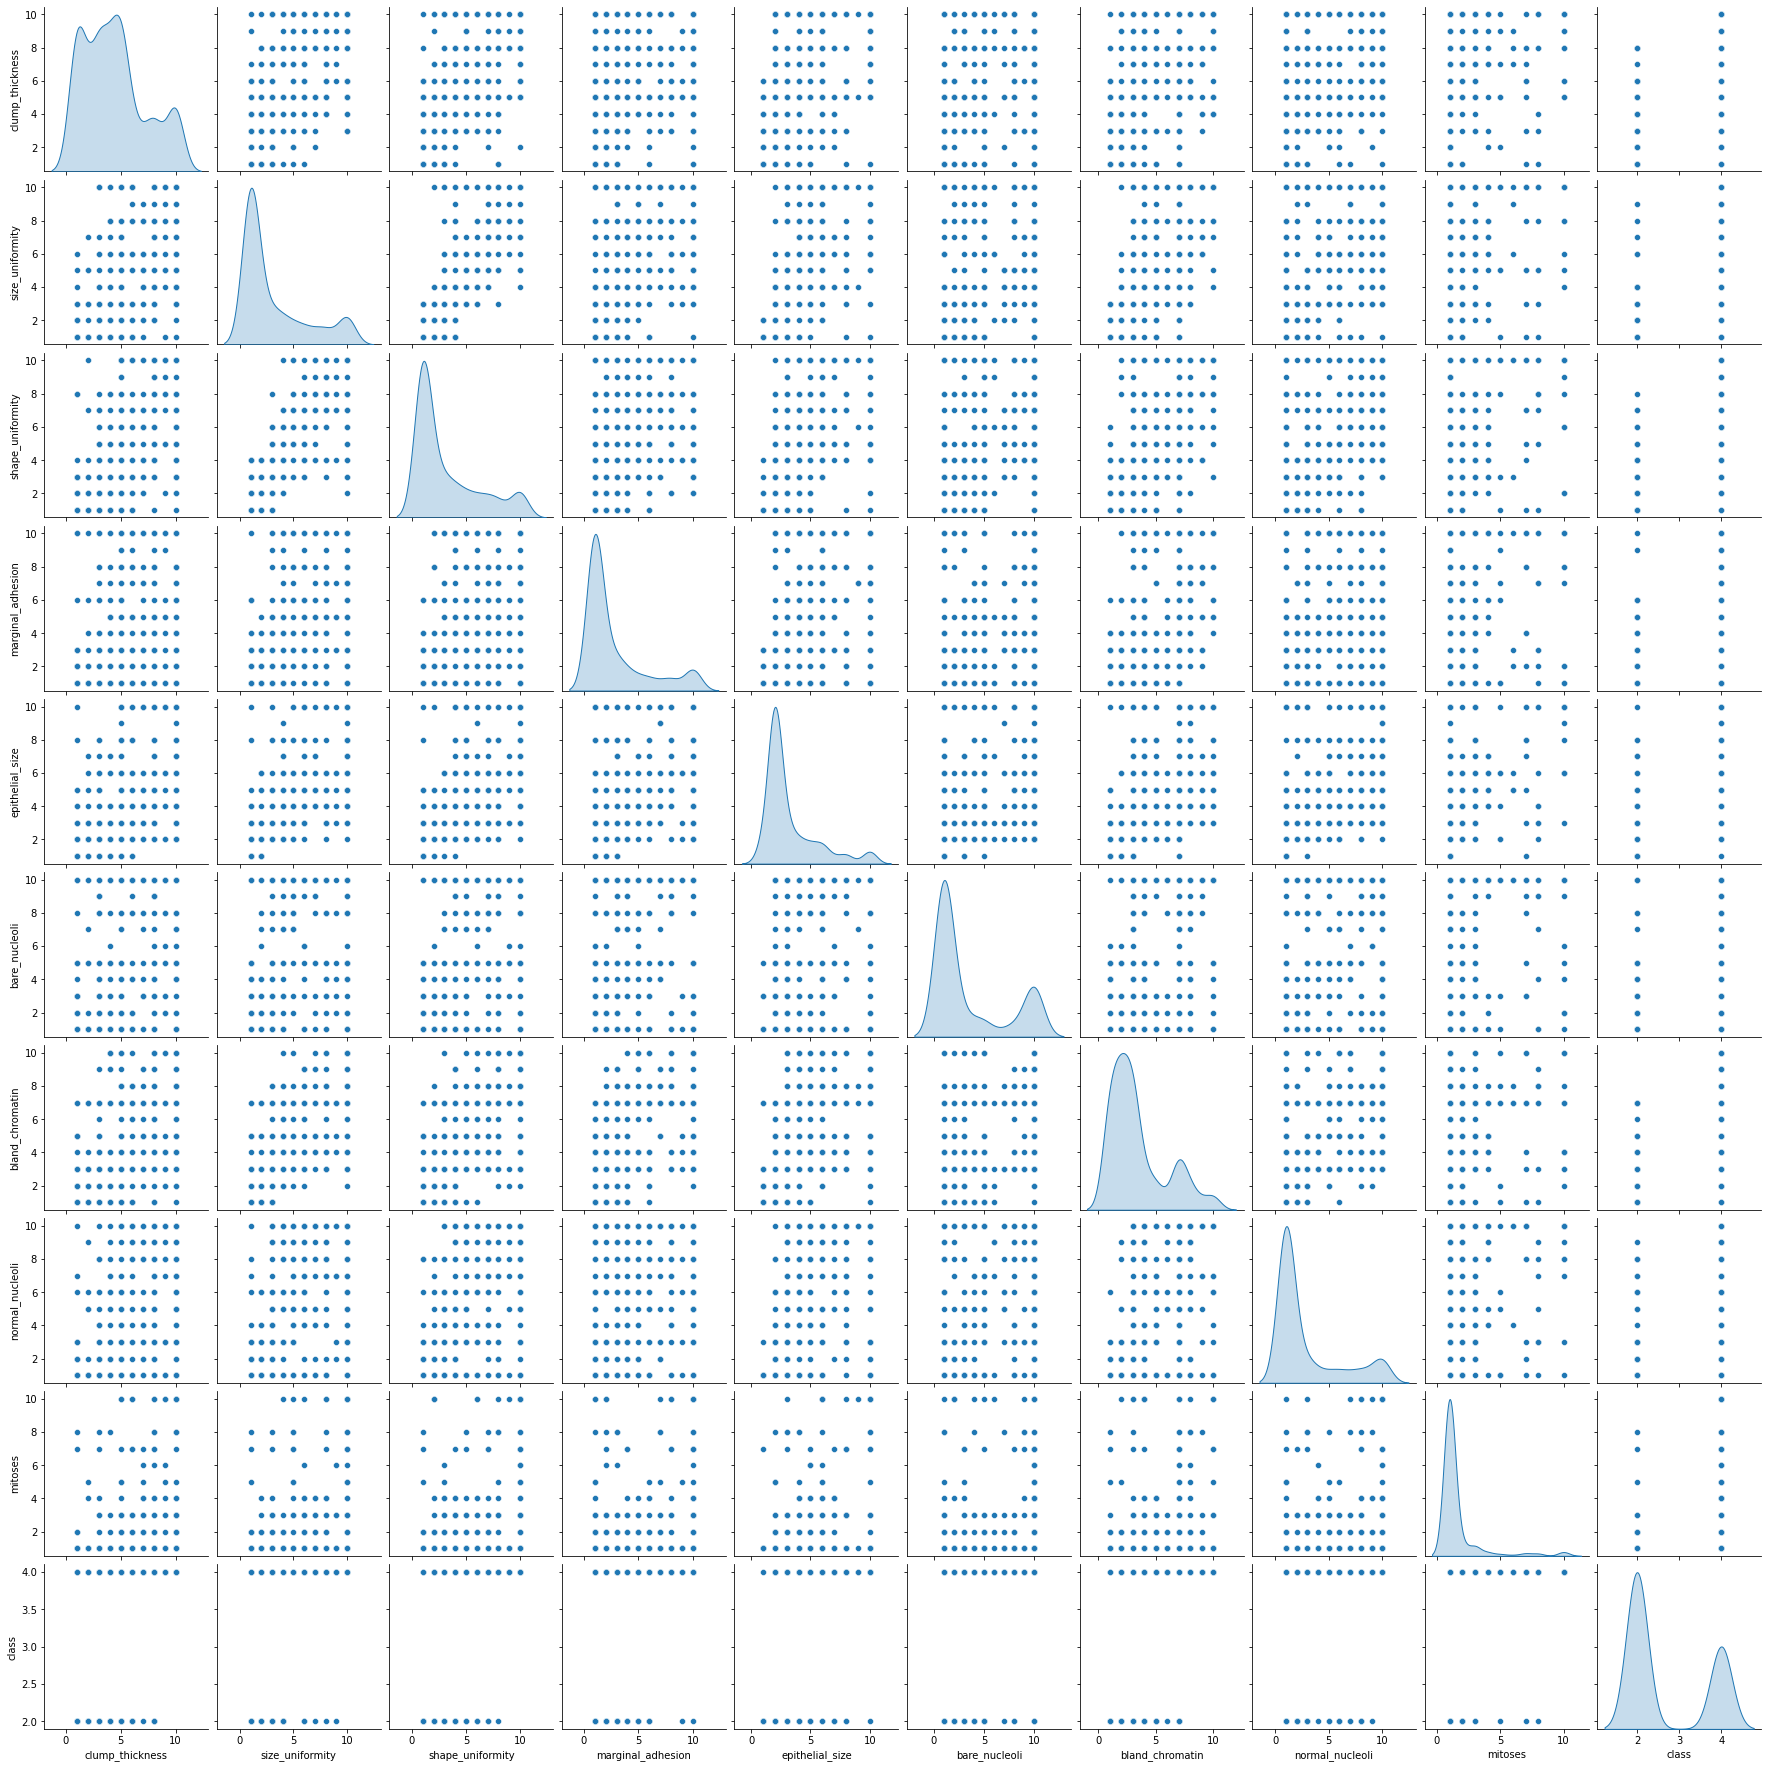

In [125]:
sns.pairplot(df, diag_kind='kde')

## Building our model

In [28]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [29]:
x= data.drop('class',axis=1)
y= data['class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# split using 70:30

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

## KneighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [34]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [35]:
pred_1 = KNN.predict(x_test)
pred_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [38]:
from scipy.stats import zscore

print('KneighborsClassifier Algorithm is predicting at:{0:.2g}%'.format(KNN.score(x_test,y_test)*100))

KneighborsClassifier Algorithm is predicting at:97%


## Support Vector Machine

In [42]:
from sklearn.svm import SVC

svc=SVC(gamma=0.25,C=3)
svc.fit(x_train,y_train)

SVC(C=3, gamma=0.25)

In [43]:
pred_2=svc.predict(x_test)
pred_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2])

In [45]:
print('Support vector Algorithm is predicting at:{0:.2g}%'.format(svc.score(x_test,y_test)*100))

Support vector Algorithm is predicting at:94%


In [46]:
knnPredictions=pd.DataFrame(pred_1)
svcPredictions=pd.DataFrame(pred_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
df1 = pd.concat([knnPredictions,svcPredictions],axis=1)
df1

<IPython.core.display.Javascript object>

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [52]:
df1.columns=[['knnPredictions','svcPredictions']]
df1

,knnPredictions,svcPredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [53]:
from sklearn.metrics import classification_report

In [55]:
print('KNN Classification report')
print('...'*10)
print(classification_report(y_test,pred_1))

KNN Classification report
..............................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [56]:
print('svc Classification report')
print('...'*10)
print(classification_report(y_test,pred_2))

svc Classification report
..............................
              precision    recall  f1-score   support

           2       1.00      0.91      0.95       137
           4       0.85      1.00      0.92        73

    accuracy                           0.94       210
   macro avg       0.92      0.95      0.93       210
weighted avg       0.95      0.94      0.94       210



Confusion matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

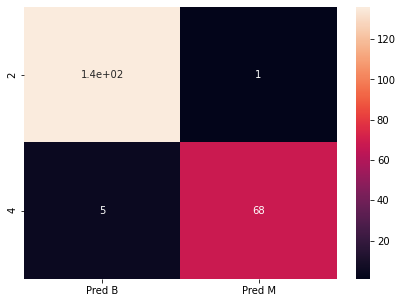

In [68]:
print('Confusion matrix for KNN')
cm=metrics.confusion_matrix(y_test,pred_1,labels=[2,4])
df_cm=pd.DataFrame(cm, index=[i for i in[2,4]],columns=[i for i in['Pred B','Pred M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

Confusion matrix for SVC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

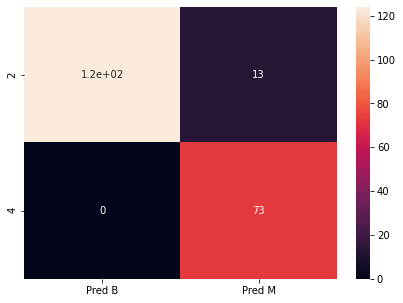

In [69]:
print('Confusion matrix for SVC')
cm=metrics.confusion_matrix(y_test,pred_2,labels=[2,4])
df_cm=pd.DataFrame(cm, index=[i for i in[2,4]],columns=[i for i in['Pred B','Pred M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

KNN model performed better in comparison to SVC.